In [1]:
#Mellin transform

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def kplaplacian_mlf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*lam)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [5]:
def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2)])
l1 = kplaplacian_mlf(G1,lam=2)
l1

array([[ 1.61111111, -1.        , -0.25      , -0.11111111, -0.25      ],
       [-1.        ,  3.25      , -1.        , -0.25      , -1.        ],
       [-0.25      , -1.        ,  2.5       , -1.        , -0.25      ],
       [-0.11111111, -0.25      , -1.        ,  2.36111111, -1.        ],
       [-0.25      , -1.        , -0.25      , -1.        ,  2.5       ]])

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,2),(5,1),(2,4),(1,4)])
l1 = kplaplacian_mlf(G1,lam=2)
l1

array([[ 3.25, -1.  , -0.25, -1.  , -1.  ],
       [-1.  ,  4.  , -1.  , -1.  , -1.  ],
       [-0.25, -1.  ,  2.5 , -1.  , -0.25],
       [-1.  , -1.  , -1.  ,  4.  , -1.  ],
       [-1.  , -1.  , -0.25, -1.  ,  3.25]])

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(1,3),(3,4),(3,5),(5,6),(4,6)])
l1 = kplaplacian_mlf(G1,lam=2)
l1

array([[ 2.61111111, -1.        , -1.        , -0.25      , -0.25      ,
        -0.11111111],
       [-1.        ,  2.61111111, -1.        , -0.25      , -0.25      ,
        -0.11111111],
       [-1.        , -1.        ,  4.25      , -1.        , -1.        ,
        -0.25      ],
       [-0.25      , -0.25      , -1.        ,  2.75      , -0.25      ,
        -1.        ],
       [-0.25      , -0.25      , -1.        , -0.25      ,  2.75      ,
        -1.        ],
       [-0.11111111, -0.11111111, -0.25      , -1.        , -1.        ,
         2.47222222]])

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(1,3),(3,4),(3,5),(5,6),(4,6)])
l1 = nx.laplacian_matrix(G1).todense()
l1

matrix([[ 2, -1, -1,  0,  0,  0],
        [-1,  2, -1,  0,  0,  0],
        [-1, -1,  4, -1, -1,  0],
        [ 0,  0, -1,  2,  0, -1],
        [ 0,  0, -1,  0,  2, -1],
        [ 0,  0,  0, -1, -1,  2]], dtype=int64)

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


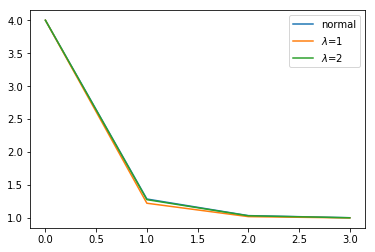

In [48]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,1)])
#G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])
#G3 = nx.Graph([(1,2),(2,3),(2,4),(4,5),(5,8),(8,7),(7,6),(6,3),(1,9),
              #(9,10),(10,12),(12,14),(14,15),(15,13),(13,11),(11,9)])
l1 = eigvals(nx.laplacian_matrix(G1).todense())
l2 = eigvals(kplaplacian_ltf(G1,lam=1))
l3 = eigvals(kplaplacian_ltf(G1,lam=2))
l4 = eigvals(kplaplacian_ltf(G1,lam=3))
l5 = eigvals(kplaplacian_ltf(G1,lam=4))
l6 = eigvals(kplaplacian_ltf(G1,lam=5))

#mellin
l2m = eigvals(kplaplacian_mlf(G1,lam=1))
l3m = eigvals(kplaplacian_mlf(G1,lam=2))
l4m = eigvals(kplaplacian_mlf(G1,lam=3))
l5m = eigvals(kplaplacian_mlf(G1,lam=4))
l6m = eigvals(kplaplacian_mlf(G1,lam=5))
#l2 = eigvals(nx.normalized_laplacian_matrix(G2).todense())
#l3 = eigvals(nx.normalized_laplacian_matrix(G3).todense())

time = np.arange(0,4)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1,label="normal")
plt.plot(time,T2, label="$\lambda$=1")
plt.plot(time,T3, label="$\lambda$=2")
plt.legend()
plt.show()

In [49]:
#zeta function

def zeta_function(L,s):
    sum = 0
    for l in L:
        if (math.isclose(l, 0.0, abs_tol=1.0e-6)==True):
            continue
        else:
            sum = sum+(1/pow(l,s))
    return sum    

In [51]:
print(l1)
zeta_function(l1,2)

[ -2.22044605e-16+0.j   2.00000000e+00+0.j   4.00000000e+00+0.j
   2.00000000e+00+0.j]


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


(0.56249999999999978+0j)

In [53]:
print(l2)
print(l2m)
print(zeta_function(l2,2))
print(zeta_function(l2m,2))

[  4.44089210e-16+0.j   2.27067057e+00+0.j   4.00000000e+00+0.j
   2.27067057e+00+0.j]
[ 0.+0.j  3.+0.j  4.+0.j  3.+0.j]
(0.450401746287+0j)
(0.284722222222+0j)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


In [55]:
print(l3)
print(l3m)
print(zeta_function(l3,2))
print(zeta_function(l3m,2))

[ 0.00000000+0.j  2.03663128+0.j  4.00000000+0.j  2.03663128+0.j]
[  4.44089210e-16+0.j   2.50000000e+00+0.j   4.00000000e+00+0.j
   2.50000000e+00+0.j]
(0.544675541912+0j)
(0.3825+0j)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


In [57]:
print(l4)
print(l4m)
print(zeta_function(l4,2))
print(zeta_function(l4m,2))

[ -8.88178420e-16+0.j   2.00495750e+00+0.j   4.00000000e+00+0.j
   2.00495750e+00+0.j]
[ 0.00+0.j  2.25+0.j  4.00+0.j  2.25+0.j]
(0.560030433776+0j)
(0.457561728395+0j)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


In [58]:
print(l5)
print(l5m)
print(zeta_function(l5,2))
print(zeta_function(l5m,2))

[ 0.00000000+0.j  2.00067093+0.j  4.00000000+0.j  2.00067093+0.j]
[ -4.44089210e-16+0.j   2.12500000e+00+0.j   4.00000000e+00+0.j
   2.12500000e+00+0.j]
(0.562164706099+0j)
(0.505406574394+0j)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


In [59]:
print(l6)
print(l6m)
print(zeta_function(l6,2))
print(zeta_function(l6m,2))

[ -4.44089210e-16+0.j   2.00009080e+00+0.j   4.00000000e+00+0.j
   2.00009080e+00+0.j]
[  4.44089210e-16+0.j   2.06250000e+00+0.j   4.00000000e+00+0.j
   2.06250000e+00+0.j]
(0.562454603162+0j)
(0.53265610652+0j)


/usr/lib/python3/dist-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
